In [1]:
import numpy as np
from time import time
import os
import sys
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import psutil
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import BigBadBrain as bbb

In [ ]:
#Load anat, glm, and motcorred red functional
#Set spacing
#Align mean red_functional to anat
#Use those params on glm

In [25]:
## Load motcorr red functional
print('Loading motcorr green functional')
file = os.path.join(fly, 'motcorr/motcorr_green.nii')
green_func = bbb.load_numpy_brain(file)
mean_green_func = np.mean(green_func, axis=-1)
mean_green_func = np.swapaxes(mean_green_func,0,1)
mean_green_func_ants = ants.from_numpy(mean_green_func)
func_xml_file = os.path.join(fly, 'functional.xml')
mean_green_func_ants.set_spacing(bbb.get_resolution(func_xml_file))

Loading motcorr green functional

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 23.39 sec


In [2]:
fly = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_30/optic'

### Load anatomy
print('Loading anatomy')
anatomy_file = os.path.join(fly, 'anatomy.nii')
anatomy = bbb.load_numpy_brain(anatomy_file)
anatomy = np.swapaxes(anatomy, 0, 1)
anatomy_ants = ants.from_numpy(anatomy)
anatomy_xml_file = os.path.join(fly, 'anatomy.xml')
anatomy_ants.set_spacing(bbb.get_resolution(anatomy_xml_file))

### Load glm
print('Loading glm')
file = os.path.join(fly, 'glm/multivariate_analysis_green_0.nii')
glm = bbb.load_numpy_brain(file)
#mean_func = np.mean(mean_func, axis=-1)
glm = np.swapaxes(glm,0,1)
glm_ants = ants.from_numpy(glm)
func_xml_file = os.path.join(fly, 'functional.xml')
glm_ants.set_spacing(bbb.get_resolution(func_xml_file))

## Load motcorr green functional
print('Loading motcorr green functional')
file = os.path.join(fly, 'motcorr/motcorr_green.nii')
green_func = bbb.load_numpy_brain(file)
green_func = np.mean(green_func, axis=-1)
green_func = np.swapaxes(green_func,0,1)
green_func_ants = ants.from_numpy(green_func)
green_func = None
func_xml_file = os.path.join(fly, 'functional.xml')
mean_green_func_ants.set_spacing(bbb.get_resolution(func_xml_file))

Loading anatomy

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 121.72 ms
Loading glm

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 54.18 ms
Loading motcorr green functional

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 49.04 sec


In [5]:
### Align functional to anatomy
print('Warping functional to anatomy')
func2anat = ants.registration(anatomy_ants, mean_green_func_ants, type_of_transform='Affine')

### Apply transforms to glm
print('Applying functional --> anatomy transforms to glm')
glm2anat = ants.apply_transforms(anatomy_ants, glm_ants, func2anat['fwdtransforms'])
save_file = os.path.join(fly, 'alignment/glm2anat.nii')
bbb.save_brain(save_file, glm2anat.numpy())

Warping functional to anatomy
Applying functional --> anatomy transforms to glm

~~ save_brain ~~
Current memory usage: 46.02GB
save_brain done. Duration: 32.61 ms


In [8]:
save_file = os.path.join(fly, 'alignment/glm2anat.nii')
bbb.save_brain(save_file, glm2anat.numpy())


~~ save_brain ~~
Current memory usage: 46.08GB
save_brain done. Duration: 152.99 ms


In [16]:
save_file = os.path.join(fly, 'alignment/green_mean.nii')
bbb.save_brain(save_file, mean_green_func_ants.numpy())


~~ save_brain ~~
Current memory usage: 46.02GB
save_brain done. Duration: 720.23 ms


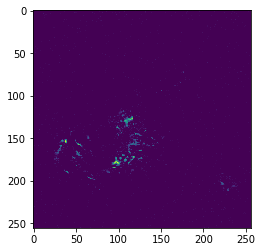

In [13]:
plt.imshow(glm_ants.numpy()[:,:,10])
plt.show()

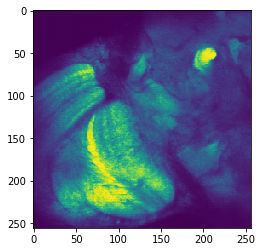

In [15]:
plt.imshow(anatomy_ants.numpy()[:,:,50])
plt.show()

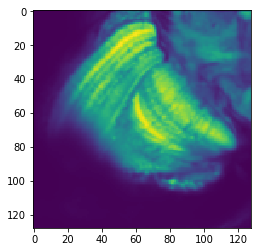

In [20]:
plt.imshow(mean_red_func_ants.numpy()[:,:,20])
plt.show()

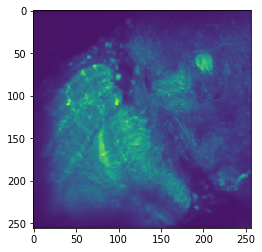

In [18]:
plt.imshow(mean_green_func_ants.numpy()[:,:,10])
plt.show()

In [ ]:
##### 
### Load glm map
print('Loading glm map')
try:
    file = os.path.join(fly, 'glm', 'multivariate_analysis_green_speed.nii')
    glm = load_numpy_brain(file)
except:
    file = os.path.join(fly, 'glm', 'multivariate_analysis_green.nii')
    glm = load_numpy_brain(file)
glm = np.swapaxes(glm,0,1)
glm_ants = ants.from_numpy(glm)
func_xml_file = os.path.join(fly, 'functional.xml')
glm_ants.set_spacing(get_resolution(func_xml_file))

### Downsample anatomy, downsample mean_func, downsample meanbrain
anatomy_ants = ants.resample_image(anatomy_ants, glm_ants.spacing)
mean_func_ants = ants.resample_image(mean_func_ants, glm_ants.spacing)
meanbrain_downsampled = ants.resample_image(meanbrain_ants, glm_ants.spacing)


### Align functional to anatomy
print('Warping functional to anatomy')
func2anat = ants.registration(anatomy_ants, mean_func_ants, type_of_transform='SyN')

### Apply transforms to glm
print('Applying functional --> anatomy transforms to glm')
glm2anat = ants.apply_transforms(anatomy_ants, glm_ants, func2anat['fwdtransforms'])
save_file = os.path.join(warp_directory, 'glm2anat_down.nii')
save_brain(save_file, glm2anat.numpy())


### Warp anatomy to meanbrain
print('Warping anatomy to meanbrain')
anat2mean = ants.registration(meanbrain_downsampled, anatomy_ants, type_of_transform='SyN')
save_file = os.path.join(warp_directory, 'anat2mean_down.nii')
save_brain(save_file, anat2mean['warpedmovout'].numpy())

### Apply transforms to glm
print('Applying anatomy --> meanbrain transforms to glm')
glm2mean = ants.apply_transforms(meanbrain_downsampled,glm2anat,anat2mean['fwdtransforms'])
save_file = os.path.join(warp_directory, 'glm2mean_down.nii')
save_brain(save_file, glm2mean.numpy())
print('Duration: {:.2f} min'.format((time()-t0)/60))